 Ce script prépare et réalise des prédiction grâce à un classifieur KNN

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


## Prepare data

In [2]:
## Ajouter un des datasets .pkl à ce projet depuis :  
## https://archive.ics.uci.edu/ml/datasets/WESAD+%28Wearable+Stress+and+Affect+Detection%29
unpickled_df = pd.read_pickle("./S7.pkl")

In [3]:
df = pd.DataFrame(unpickled_df, columns=['signal'])  
labels = pd.DataFrame(unpickled_df, columns=['label'])  
df['signal'].apply(pd.Series)

,ACC,ECG,EMG,EDA,Temp,Resp,BVP,TEMP
chest,"[[1.0696001052856445, -0.013999998569488525, 1...","[[-0.01922607421875], [-0.016937255859375], [-...","[[-0.0488433837890625], [-0.0070037841796875],...","[[12.506866455078125], [12.468719482421875], [...","[[33.99353], [33.93268], [33.970703], [34.0087...","[[1.83258056640625], [1.83563232421875], [1.85...",NaN,NaN
wrist,"[[127.0, -50.0, 127.0], [127.0, 46.0, -8.0], [...",NaN,NaN,"[[5.969716], [6.1002], [6.096362], [6.088686],...",NaN,NaN,"[[9.57], [7.41], [5.11], [2.84], [0.72], [-1.2...","[[33.25], [33.25], [33.25], [33.25], [33.31], ..."


In [4]:
dfChest = df.drop('wrist')
dfChest = pd.DataFrame.from_records(dfChest.signal.tolist())

In [5]:
ecg = dfChest.iloc[0]['ECG']
eda = dfChest.iloc[0]['EDA']
emg = dfChest.iloc[0]['EMG']
resp = dfChest.iloc[0]['Resp']
temp = dfChest.iloc[0]['Temp']
dfChestArray= np.concatenate((ecg,eda,emg,resp,temp), axis=1)
dfChestArray

array([[-1.92260742e-02,  1.25068665e+01, -4.88433838e-02,
         1.83258057e+00,  3.39935303e+01],
       [-1.69372559e-02,  1.24687195e+01, -7.00378418e-03,
         1.83563232e+00,  3.39326782e+01],
       [-1.61590576e-02,  1.25068665e+01,  7.17773438e-02,
         1.85699463e+00,  3.39707031e+01],
       ...,
       [ 8.63800049e-02,  1.30901337e+01,  1.99768066e-01,
         8.04138184e-01,  3.49432983e+01],
       [ 1.39938354e-01,  1.30813599e+01,  2.27645874e-01,
         8.34655762e-01,  3.49402466e+01],
       [ 2.38998413e-01,  1.30802155e+01,  2.18078613e-01,
         8.37707520e-01,  3.49479065e+01]])

### Attribute set

In [6]:
dfChest = pd.DataFrame(dfChestArray, columns=['ECG','EDA','EMG','Resp','Temp'])
print(dfChest.head(5))
print(dfChest.shape)

        ECG        EDA       EMG      Resp       Temp
0 -0.019226  12.506866 -0.048843  1.832581  33.993530
1 -0.016937  12.468719 -0.007004  1.835632  33.932678
2 -0.016159  12.506866  0.071777  1.856995  33.970703
3 -0.012405  12.506485  0.088486  1.829529  34.008759
4 -0.020325  12.504959  0.090271  1.817322  33.887085
(3666600, 5)


In [7]:
bigdata = pd.merge(dfChest,labels, left_index=True, right_index=True)
bigdata = bigdata[bigdata.label < 5]
bigdata.shape

(3563700, 6)

In [8]:
#smaller sample reduction
sample = bigdata.sample(100000)
sample.head(5)

,ECG,EDA,EMG,Resp,Temp,label
2382660,0.122177,18.065262,0.003616,0.509644,34.861572,2
2576607,-0.183975,19.937515,0.001053,-2.900696,35.001923,2
1674711,-0.038315,11.547470,-0.004623,-2.394104,34.617126,4
3547022,0.150467,12.373352,-0.005905,-2.510071,34.806183,0
56642,-0.080521,12.831497,-0.022476,1.350403,34.156555,0


### Attribute set

In [9]:
targets = sample['label']
sample = sample.drop('label', axis=1)

In [10]:
sample.shape

(100000, 5)

### Target set

In [11]:
targets.shape

(100000,)

In [12]:
stat = targets.value_counts(dropna=False)
stat

0    41171
1    23155
4    15669
2    12713
3     7292
Name: label, dtype: int64

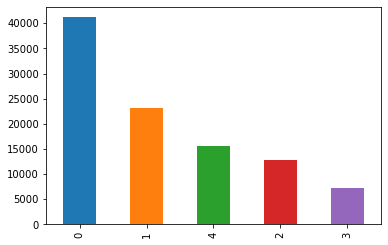

In [13]:
stat.plot(kind='bar')
stat.plot

In [14]:
X_train, X_test, y_train, y_test = train_test_split(sample.values,
                targets, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80000, 5) (80000,)
(20000, 5) (20000,)


## Classification with K-NN

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [17]:
y_pred = classifier.predict(X_test)

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.84      0.88      8203
          1       0.83      0.88      0.86      4631
          2       0.93      0.95      0.94      2496
          3       0.72      0.79      0.75      1455
          4       0.77      0.86      0.81      3215

avg / total       0.87      0.86      0.86     20000

Confusion Matrix:


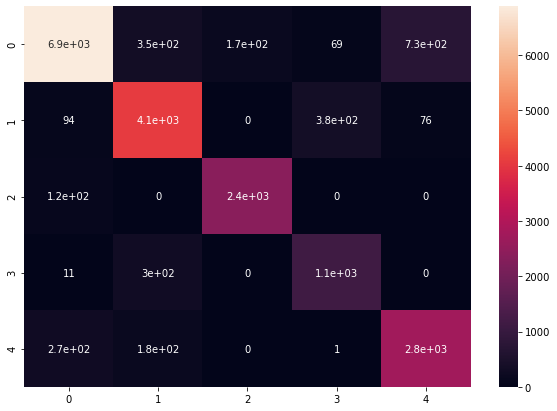

In [18]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = [i for i in "01234"],
                  columns = [i for i in "01234"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")